In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
# we want to get mean of all the male or female how spend more total_bill

df.groupby('sex',observed=False)[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [22]:
# want based on sex and smoker -> spend

df.groupby(['sex','smoker'],observed=False)[['total_bill']].mean()

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [23]:
df.groupby(['sex','smoker'],observed=False)[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [ ]:
# pivot -> this gives the over all summary of the data, 

In [26]:
# so we can do this easily by pivot ,

df.pivot_table(index="sex",columns='smoker',values="total_bill",observed=False)

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [43]:
# aggfunc

# by default aggfunc => mean

df.pivot_table(index="sex",columns='smoker',values='total_bill',aggfunc='sum',observed=False)

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [45]:
# all cols together

df.pivot_table(index='sex',columns='smoker',values=["total_bill",'tip','size'],observed=False)

size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [47]:
# fetch value from all
df.pivot_table(index='sex',columns='smoker',values=["total_bill",'tip','size'],observed=False)['size']

smoker,Yes,No
sex,,
Male,2.500000,2.711340
Female,2.242424,2.592593


In [50]:
# multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc='mean',observed=False)

size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [51]:
# diff aggfunc to diff values
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'sum','tip':'sum','total_bill':'mean'},observed=False)

size                                                  tip  \
day            Thur          Fri          Sat          Sun          Thur   
time          Lunch Dinner Lunch Dinner Lunch Dinner Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       23      0     5     12     0     71     0     39  30.58   
       No        50      0     0      4     0     85     0    124  58.83   
Female Yes       17      0     6      8     0     33     0     10  20.93   
       No        60      2     3      2     0     30     0     43  58.49   

                      ...                             total_bill         \
day                   ...   Sat           Sun               Thur          
time          Dinner  ... Lunch  Dinner Lunch  Dinner      Lunch Dinner   
sex    smoker         ...                                                 
Male   Yes       0.0  ...   0.0   77.74   0.0   52.82  19.171000    NaN   
       No        0.0  ...   0.0  104.21   0.0  133.96  18.486500    NaN   
Female Yes       0.0  ...   0.0   43.03   0.0   14.00  19.218571    NaN   
       No        3.0  ...   0.0   35.42   0.0   46.61  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286  

[4 rows x 22 columns]

In [55]:
# margins
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True,observed=False)

# All -> show the sum

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [57]:
# plotting graphs
df = pd.read_csv('expense_data.csv')
df

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [60]:
df['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [61]:
# we want ki , how much this men spend money in each category , plot graph

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [63]:
# change date datatype(object) -> datetime
df['Date'] = pd.to_datetime(df["Date"])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [66]:
# get the months
df['month'] = df['Date'].dt.month_name()

In [67]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


<Axes: xlabel='month'>

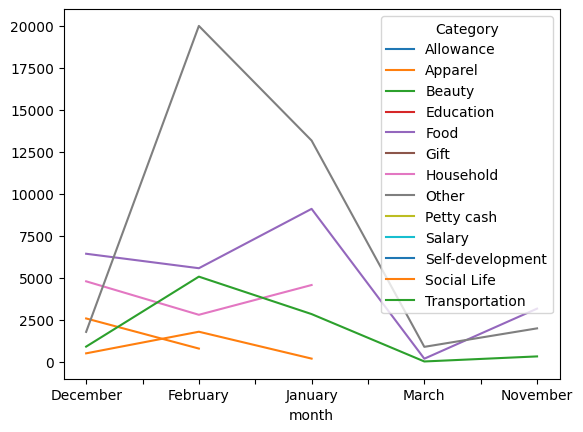

In [69]:
df.pivot_table(index='month',columns = 'Category',values='INR',aggfunc='sum',observed=False).plot()

<Axes: xlabel='month'>

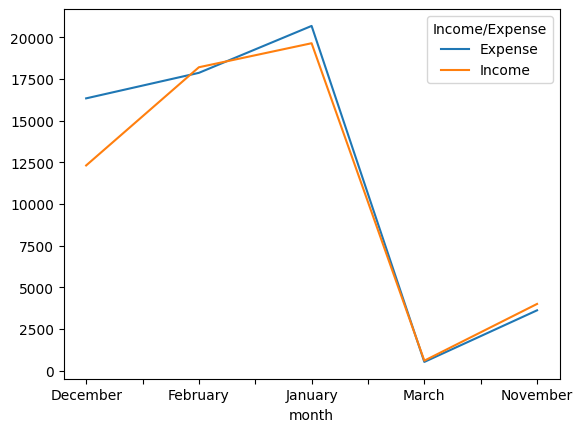

In [71]:
df.pivot_table(index='month',columns = 'Income/Expense',values='INR',aggfunc='sum',observed=False).plot()

<Axes: xlabel='month'>

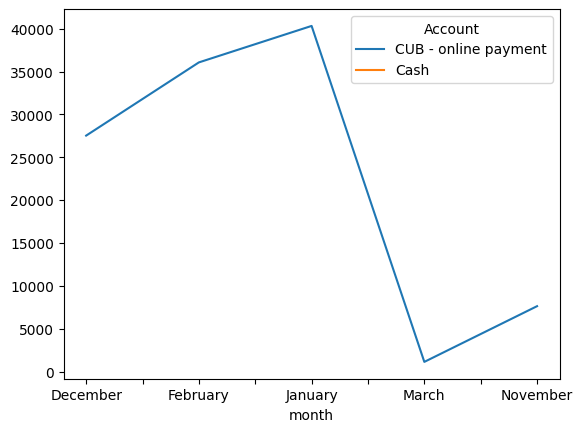

In [72]:
df.pivot_table(index='month',columns = 'Account',values='INR',aggfunc='sum',observed=False).plot()